In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm

df = pd.read_csv(r"C:\Users\Jawad Rashid\Downloads\daily_step_count.csv", encoding= 'ascii')

print(df.to_string())

           Date  Total Steps
0     10/9/2022           57
1    10/10/2022         3349
2    10/11/2022         7852
3    10/12/2022        10928
4    10/13/2022         7422
5    10/14/2022         8410
6    10/15/2022         5540
7    10/16/2022         2752
8    10/17/2022         7571
9    10/18/2022         3402
10   10/19/2022         9073
11   10/20/2022        11505
12   10/21/2022        10638
13   10/22/2022         9315
14   10/23/2022        10854
15   10/24/2022         8726
16   10/25/2022         9212
17   10/26/2022         2221
18   10/27/2022         7937
19   10/28/2022         7977
20   10/29/2022         8653
21   10/30/2022         9372
22   10/31/2022         9582
23    11/1/2022         5546
24    11/2/2022         9588
25    11/3/2022         9164
26    11/4/2022         7559
27    11/5/2022         9287
28    11/6/2022         3441
29    11/7/2022         4180
30    11/8/2022         8504
31    11/9/2022        11098
32   11/10/2022         8789
33   11/11/202

In [8]:


df.isnull().sum()
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes


Date           datetime64[ns]
Total Steps             int64
dtype: object

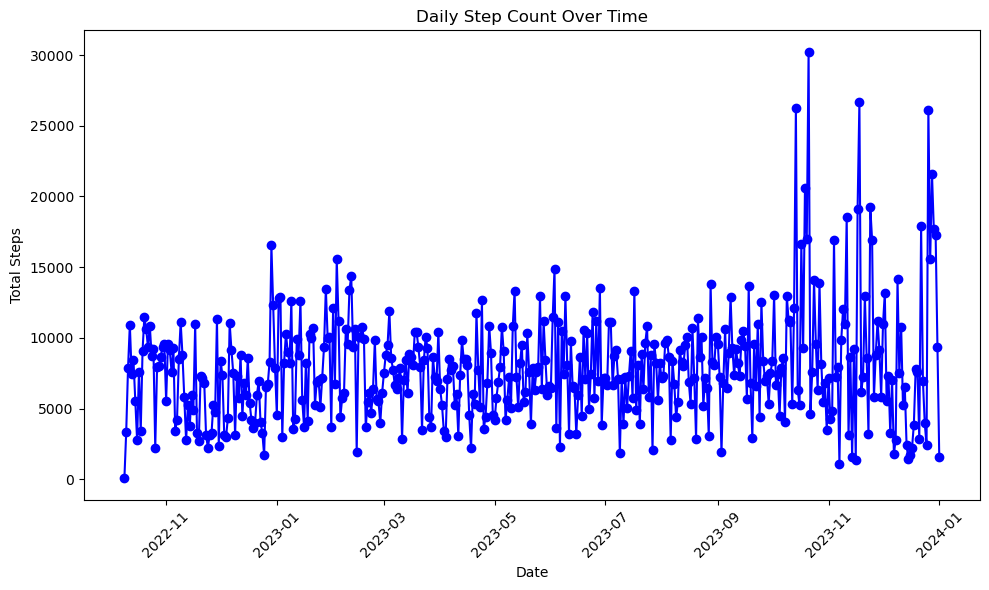

In [9]:
# Summarize the dataset
df.describe()

# Plotting the daily step counts over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Total Steps'], marker='o', linestyle='-', color='b')
plt.title('Daily Step Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Identifying outliers using the Interquartile Range (IQR) method
Q1 = df['Total Steps'].quantile(0.25)
Q3 = df['Total Steps'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Total Steps'] < lower_bound) | (df['Total Steps'] > upper_bound)]

# Display outliers
outliers

,Date,Total Steps
81,2022-12-29,16531
370,2023-10-14,26279
373,2023-10-17,16627
375,2023-10-19,20581
376,2023-10-20,17020
377,2023-10-21,30239
391,2023-11-04,16905
398,2023-11-11,18571
404,2023-11-17,19128
405,2023-11-18,26701


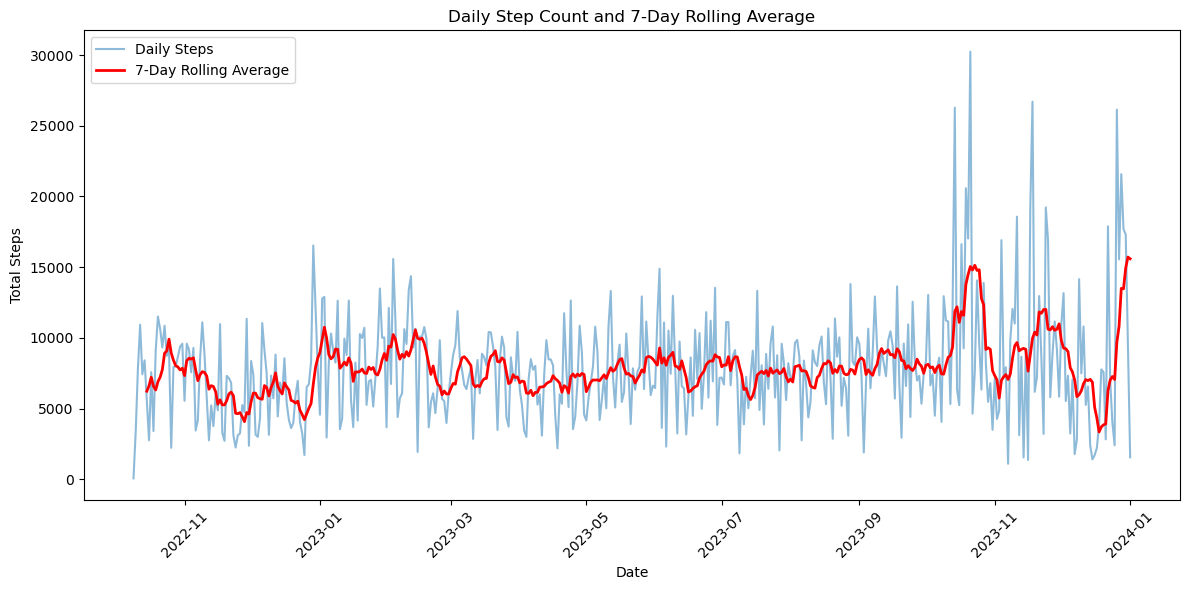

In [11]:
# Analyzing patterns or trends in the daily step counts using a rolling average
# Calculate the 7-day rolling average for smoother trend analysis
df['7-Day Rolling Avg'] = df['Total Steps'].rolling(window=7).mean()

# Plotting the daily step counts with the rolling average
df.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Steps'], label='Daily Steps', alpha=0.5)
plt.plot(df.index, df['7-Day Rolling Avg'], label='7-Day Rolling Average', color='red', linewidth=2)
plt.title('Daily Step Count and 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

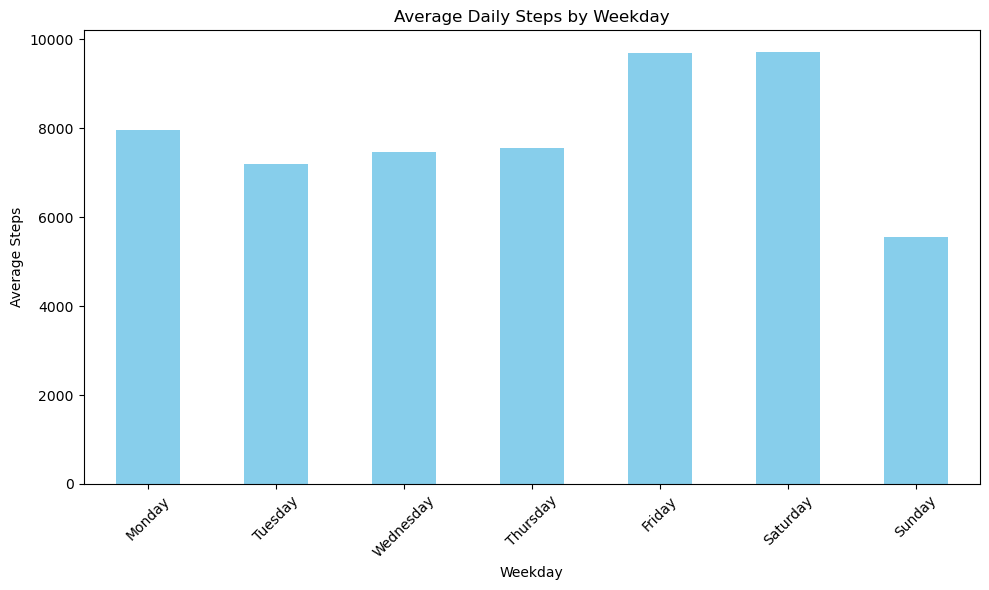

In [12]:
# Add a new column for the day of the week
df['Weekday'] = df.index.day_name()

# Calculate the average steps for each weekday
df_weekday_avg = df.groupby('Weekday')['Total Steps'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the average steps by weekday
plt.figure(figsize=(10, 6))
df_weekday_avg.plot(kind='bar', color='skyblue')
plt.title('Average Daily Steps by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Resetting the index to make 'Date' a column again
df.reset_index(inplace=True)

# Re-running the analysis with the corrected dataframe
# Identify streaks of consecutive days meeting/exceeding the daily step goal of 6500 steps
df['Meets Goal'] = df['Total Steps'] >= 6500

df['Streak'] = (df['Meets Goal'] != df['Meets Goal'].shift()).cumsum()
df_streaks = df[df['Meets Goal']].groupby('Streak').agg(Start_Date=('Date', 'min'), End_Date=('Date', 'max'), Days=('Date', 'count'))

# Filter out single days to focus on consecutive days
consecutive_streaks = df_streaks[df_streaks['Days'] > 1]

# Find the highest and lowest step counts
highest_steps = df['Total Steps'].max()
lowest_steps = df['Total Steps'].min()

print(consecutive_streaks)
print('Highest Steps:', highest_steps)
print('Lowest Steps:', lowest_steps)

# Visualizing the streaks
plt.figure(figsize=(10, 6))
plt.bar(consecutive_streaks.index, consecutive_streaks['Days'], color='green')
plt.title('Streaks of Consecutive Days Meeting Daily Step Goal')
plt.xlabel('Streak Number')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()